# Import Packages/Libraries

In [ ]:
#!pip install pyLDAvis

In [ ]:
#pip install --upgrade pip

In [58]:
import sklearn

In [60]:
from sklearn.model_selection import GridSearchCV

In [59]:
print(sklearn.__version__)

0.21.2


In [1]:
import pandas as pd
import numpy as np
import re, nltk, spacy, gensim

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
from sklearn.cluster import KMeans

In [122]:
from sklearn.metrics.pairwise import euclidean_distances

In [141]:
from textblob import TextBlob

In [293]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [319]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans

In [320]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [549]:
import pickle

# Import Data

In [2]:
df = pd.read_csv('clean6.csv')

In [3]:
df.head()

,artist,title,lyrics,source
0,10000 maniacs,more than this,i could feel at the time. there was no way of ...,sixgen
1,10000 maniacs,because the night,"take me now, baby, here as i am. hold me close...",sixgen
2,10000 maniacs,these are days,these are. these are days you'll remember. nev...,sixgen
3,10000 maniacs,a campfire song,"a lie to say, ""o my mountain has coal veins an...",sixgen
4,10000 maniacs,everyday is like sunday,trudging slowly over wet sand. back to the ben...,sixgen


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.lyrics[0]

"i could feel at the time. there was no way of knowing. fallen leaves in the night. who can say where they're blowing. as free as the wind. hopefully learning. why the sea on the tide. has no way of turning. more than this. you know there's nothing. more than this. tell me one thing. more than this. you know there's nothing. it was fun for a while. there was no way of knowing. like a dream in the night. who can say where we're going. no care in the world. maybe i'm learning. why the sea on the tide. has no way of turning. more than this. you know there's nothing. more than this. tell me one thing. more than this. you know there's nothing. more than this. you know there's nothing. more than this. tell me one thing. more than this. there's nothing."

In [6]:
type(df)

pandas.core.frame.DataFrame

# Confirm No Nulls

In [7]:
df.lyrics.isna().sum()

1

In [8]:
#id the null index
df[df.lyrics.isna()]

,artist,title,lyrics,source
208,3 doors down,believe it,NaN,sixgen


In [9]:
#drop the row
df = df.drop(208, axis = 0)

In [10]:
df.lyrics.isna().sum()

0

In [11]:
df.to_csv('clean7', index=False)

# Check Out Data

In [12]:
df.tail()

,artist,title,lyrics,source
66908,nayara portela,sign of the times (harry styles cover),just stop your crying. it's a sign of the time...,sixgen
66909,nayara portela,stay (rihanna cover),all along it was a fever. a cold sweat hot-hea...,sixgen
66910,nayara portela,when i was your man (bruno mars cover),"same bed, but it feels just a little bit bigge...",sixgen
66911,sambo,"sunday, bloody sunday",i can't believe the news today. i can't close ...,sixgen
66912,zeca pagodinho,deixa a vida me levar (translation),i've been. for almost everything in life. in t...,sixgen


In [18]:
len(df)

66912

# Data Prep with Regex

In [19]:
# Convert to list
data = df.lyrics.values.tolist()

In [20]:
# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

<>:2: DeprecationWarning: invalid escape sequence \s
<>:2: DeprecationWarning: invalid escape sequence \s
<>:2: DeprecationWarning: invalid escape sequence \s
<ipython-input-20-7cb230713c99>:2: DeprecationWarning: invalid escape sequence \s
  data = [re.sub('\s+', ' ', sent) for sent in data]


['i could feel at the time. there was no way of knowing. fallen leaves in the '
 'night. who can say where theyre blowing. as free as the wind. hopefully '
 'learning. why the sea on the tide. has no way of turning. more than this. '
 'you know theres nothing. more than this. tell me one thing. more than this. '
 'you know theres nothing. it was fun for a while. there was no way of '
 'knowing. like a dream in the night. who can say where were going. no care in '
 'the world. maybe im learning. why the sea on the tide. has no way of '
 'turning. more than this. you know theres nothing. more than this. tell me '
 'one thing. more than this. you know theres nothing. more than this. you know '
 'theres nothing. more than this. tell me one thing. more than this. theres '
 'nothing.']


In [354]:
type(data)

list

# Tokenize & Cleanup With GenSim

In [21]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [23]:
df_words = list(sent_to_words(data))

print(df_words[:1])

          artist           title  \
0  10000 maniacs  more than this   

                                              lyrics  source  
0  i could feel at the time. there was no way of ...  sixgen  


In [24]:
print(df_words[:1])

[['could', 'feel', 'at', 'the', 'time', 'there', 'was', 'no', 'way', 'of', 'knowing', 'fallen', 'leaves', 'in', 'the', 'night', 'who', 'can', 'say', 'where', 'theyre', 'blowing', 'as', 'free', 'as', 'the', 'wind', 'hopefully', 'learning', 'why', 'the', 'sea', 'on', 'the', 'tide', 'has', 'no', 'way', 'of', 'turning', 'more', 'than', 'this', 'you', 'know', 'theres', 'nothing', 'more', 'than', 'this', 'tell', 'me', 'one', 'thing', 'more', 'than', 'this', 'you', 'know', 'theres', 'nothing', 'it', 'was', 'fun', 'for', 'while', 'there', 'was', 'no', 'way', 'of', 'knowing', 'like', 'dream', 'in', 'the', 'night', 'who', 'can', 'say', 'where', 'were', 'going', 'no', 'care', 'in', 'the', 'world', 'maybe', 'im', 'learning', 'why', 'the', 'sea', 'on', 'the', 'tide', 'has', 'no', 'way', 'of', 'turning', 'more', 'than', 'this', 'you', 'know', 'theres', 'nothing', 'more', 'than', 'this', 'tell', 'me', 'one', 'thing', 'more', 'than', 'this', 'you', 'know', 'theres', 'nothing', 'more', 'than', 'this', 

In [355]:
type(df_words)

list

In [25]:
len(df_words)

66912

In [142]:
df.tail()

,artist,title,lyrics,source,lda_topic
66908,nayara portela,sign of the times (harry styles cover),just stop your crying. it's a sign of the time...,sixgen,10
66909,nayara portela,stay (rihanna cover),all along it was a fever. a cold sweat hot-hea...,sixgen,10
66910,nayara portela,when i was your man (bruno mars cover),"same bed, but it feels just a little bit bigge...",sixgen,10
66911,sambo,"sunday, bloody sunday",i can't believe the news today. i can't close ...,sixgen,10
66912,zeca pagodinho,deixa a vida me levar (translation),i've been. for almost everything in life. in t...,sixgen,10


In [356]:
len(df)

66912

# Lemmatizing the Data

In [26]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

In [27]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)

nlp = spacy.load('en', disable=['parser', 'ner'])

In [28]:
# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(df_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:2])

['could feel time there be way know fall leave night can say where be blow as free wind hopefully learn why sea tide have way turn more know there s nothing more tell thing more know there s nothing be fun there be way know dream night can say where be go care world maybe be learn why sea tide have way turn more know there s nothing more tell thing more know there s nothing more know there s nothing more tell thing more there s nothing', 'take now baby here be hold close try understand desire be hunger be fire breathe love be banquet feed come now try understand way feel command take hand sun descend not hurt now not hurt now not hurt now night belong lover night belong night belong lover cause night belong have doubt baby when be alone love be re telephone love be angel disguise lust here bed morning come come now try understand way feel command take hand sun descend not hurt now not hurt now not hurt now night belong lover night belong night belong lover night belong love sleep doubt

In [383]:
type(data_lemmatized)

list

# Assign RegExed,  Punctuation-less & Lemmatized Lyric Data to DataFrame

In [386]:
df["lyric_bow"] = ""
df.head()

,artist,title,lyrics,source,lda_topic,lyric_bow
0,10000 maniacs,more than this,i could feel at the time. there was no way of ...,sixgen,10,
1,10000 maniacs,because the night,"take me now, baby, here as i am. hold me close...",sixgen,10,
2,10000 maniacs,these are days,these are. these are days you'll remember. nev...,sixgen,10,
3,10000 maniacs,a campfire song,"a lie to say, ""o my mountain has coal veins an...",sixgen,10,
4,10000 maniacs,everyday is like sunday,trudging slowly over wet sand. back to the ben...,sixgen,10,


In [387]:
df['lyric_bow'] = data_lemmatized

In [388]:
df.head()

,artist,title,lyrics,source,lda_topic,lyric_bow
0,10000 maniacs,more than this,i could feel at the time. there was no way of ...,sixgen,10,could feel time there be way know fall leave n...
1,10000 maniacs,because the night,"take me now, baby, here as i am. hold me close...",sixgen,10,take now baby here be hold close try understan...
2,10000 maniacs,these are days,these are. these are days you'll remember. nev...,sixgen,10,be be day remember never before never promise ...
3,10000 maniacs,a campfire song,"a lie to say, ""o my mountain has coal veins an...",sixgen,10,lie say mountain have coal vein bed dig man ax...
4,10000 maniacs,everyday is like sunday,trudging slowly over wet sand. back to the ben...,sixgen,10,trudge slowly wet sand back bench where clothe...


# Creating the Document Word Matrix

In [29]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,                        # minimum reqd occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             # max_features=50000,             # max number of uniq words
                            )

In [30]:
data_vectorized = vectorizer.fit_transform(data_lemmatized)

In [143]:
type(data_vectorized)

scipy.sparse.csr.csr_matrix

# Check for Scrantonicity.. just kidding

Check for how sparse the matrix is (How much of the matrix are data points that are zeros.)

In [31]:
# Materialize the sparse data
data_dense = data_vectorized.todense()

In [32]:
# Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

Sparsicity:  0.34361932159235153 %


# Build Out the LDA Model w/SkLearn

In [35]:
# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=20,               # Number of topics
                                      max_iter=10,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )

In [36]:
lda_model

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=20, n_jobs=-1,
                          perp_tol=0.1, random_state=100, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [37]:
lda_output = lda_model.fit_transform(data_vectorized)

# Assessing Model Performance

Log-likelihood. ... In turn, given a sample and a parametric family of distributions (i.e., a set of distributions indexed by a parameter) that could have generated the sample, the likelihood is a function that associates to each parameter the probability (or probability density) of observing the given sample.
source = https://www.statlect.com/glossary/log-likelihood

A model with higher log-likelihood and lower perplexity (exp(-1. * log-likelihood per word)) is considered to be good. Let’s check for our model.

In [39]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))

Log Likelihood:  -39365576.134877875


In [40]:
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))

Perplexity:  1137.273141034906


In [41]:
# See model parameters
pprint(lda_model.get_params())

{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 20,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


# GridSearch LDA Models

In [42]:
# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}


In [43]:
# Init the Model
lda = LatentDirichletAllocation()

In [44]:
# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

In [45]:
# Do the Grid Search
model.fit(data_vectorized)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                   

# Finding the best Parameters

In [46]:
# Best Model
best_lda_model = model.best_estimator_

In [389]:
best_lda_model
#will later be lda_model_best

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.5,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [47]:
# Model Parameters
print("Best Model's Params: ", model.best_params_)

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 10}


In [48]:
# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

Best Log Likelihood Score:  -13218459.63115705


In [49]:
# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Model Perplexity:  1026.870949651008


In [553]:
with open('gslda10topics.pickle', 'wb') as f:
    pickle.dump(best_lda_model, f)

# Compare Performance Scores

In [283]:
# for x in model.cv_results_['params']:
#     print(type(x))

In [284]:
model.cv_results_['mean_test_score'][0]

-13218459.63115705

In [ ]:
[round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.5]

In [285]:
def thisthing(model,decay):
    log_likelyhoods_5 = []
    log_likelyhoods_7 = []
    log_likelyhoods_9 = []
    ind=0
    for dictt in model.cv_results_['params']:
        if dictt['learning_decay'] == .5:
            log_likelyhoods_5.append(model.cv_results_['mean_test_score'][ind])
            ind += 1
        elif dictt['learning_decay'] == .7:
            log_likelyhoods_7.append(model.cv_results_['mean_test_score'][ind])
            ind += 1            
        elif dictt['learning_decay'] == .9:
            log_likelyhoods_9.append(model.cv_results_['mean_test_score'][ind])
            ind += 1            
    return log_likelyhoods_5, log_likelyhoods_7, log_likelyhoods_9

#     for mean in model.cv_results_['mean_test_score']:
#         if gscore['learning_decay'] == 0.5:
#             gscores.append(mean)


In [252]:
def thisthing(model,decay):
    count = 0
    for key in model.cv_results_['params']:
        if key['learning_decay'] == decay:
            count += 1
        else:
            continue
    print(count)
    return model.cv_results_['mean_test_score'][:count+1]

#     for mean in model.cv_results_['mean_test_score']:
#         if gscore['learning_decay'] == 0.5:
#             gscores.append(mean)


In [288]:
#Get Log Likelyhoods from Grid Seach Output
n_topics = [10, 15, 20, 25, 30]
log_likelyhoods_5 = thisthing(model, 0.5)[0]
log_likelyhoods_7 = thisthing(model, 0.7)[1]
log_likelyhoods_9 = thisthing(model, 0.9)[2]

In [265]:
log_likelyhoods_5 = model.cv_results_['mean_test_score'][:5]
log_likelyhoods_7 = model.cv_results_['mean_test_score'][5:10]
log_likelyhoods_9 = model.cv_results_['mean_test_score'][10:]

In [289]:
print(log_likelyhoods_5)
print()
print(log_likelyhoods_7)
print()
print(log_likelyhoods_9)

[-13218459.63115705, -13233670.212704066, -13268620.413796125, -13312673.956442801, -13334897.654474437]

[-13218597.543636926, -13249279.887597442, -13283918.723365981, -13302909.299461236, -13340185.81671307]

[-13236245.552536912, -13244521.636515846, -13271518.508833166, -13303653.951757642, -13340843.087130835]


In [214]:
type(log_likelyhoods_5[0])

numpy.float64

In [217]:
len(n_topics)

5

In [220]:
print(log_likelyhoods_5[0:5])

[-13218459.63115705 -13233670.21270407 -13268620.41379612
 -13312673.9564428  -13334897.65447444]


In [243]:
print(log_likelyhoods_7[0:5])

[-13218459.63115705 -13233670.21270407 -13268620.41379612
 -13312673.9564428  -13334897.65447444]


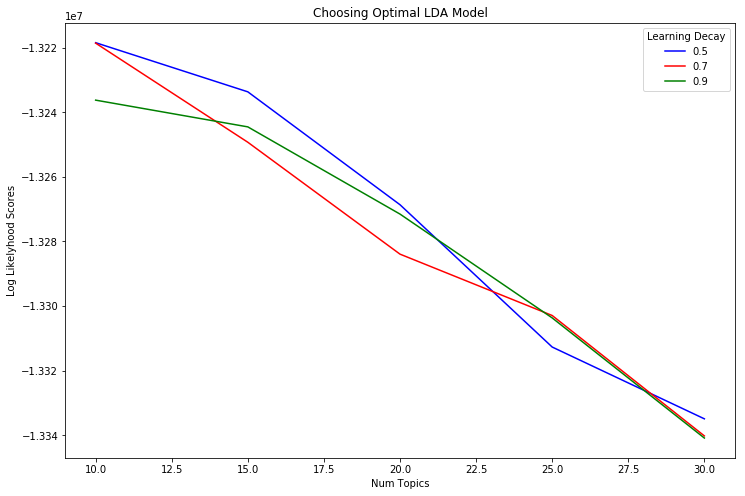

In [266]:
# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods_5[0:5], label='0.5', color='b')
plt.plot(n_topics, log_likelyhoods_7[0:5], label='0.7', color='r')
plt.plot(n_topics, log_likelyhoods_9[0:5], label='0.9', color='g')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning Decay', loc='best')
plt.show()

# Best LDA Model w/SkLearn

In [390]:
# Build LDA Model using best parameters
lda_model_best = LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.5,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=-1,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0               # Use all available CPUs
                                     )

In [391]:
lda_model_best

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.5,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=-1,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [392]:
best_lda_output = lda_model_best.fit_transform(data_vectorized)

In [393]:
#grab vocab of words
len(vectorizer.get_feature_names())

13107

In [394]:
type(vectorizer.get_feature_names())

list

In [395]:
#call a sample
vectorizer.get_feature_names()[1]

'aaaah'

In [396]:
#grab the topics
lda_model_best.components_

array([[ 1.60675988,  0.10001441,  0.10001108, ..., 15.95382278,
         0.10002311,  7.77101242],
       [ 0.10001538,  0.10001289,  0.10001843, ..., 19.78790806,
         0.10027615,  0.1000051 ],
       [ 0.10510732, 50.92459901,  5.85286025, ...,  0.11998112,
         0.69027635,  0.10000935],
       ...,
       [ 0.10002545,  0.10000193,  0.10002023, ...,  5.6625255 ,
         2.86287956,  0.10001163],
       [23.42800592, 35.35752376,  0.10001023, ...,  6.06757179,
         0.10001018,  0.10000917],
       [ 0.10000204,  0.10000194,  3.74491691, ...,  0.10002091,
         0.10000836,  0.10001036]])

In [397]:
lda_model_best.components_.shape

(10, 13107)

In [407]:
single_topic = lda_model_best.components_[1]

In [408]:
single_topic.argsort()

array([ 7810, 13076, 11952, ..., 12618,  6540,  4777])

In [409]:
#argsort returns index positions sorted from least to greatest
#looking to return the top 10 values since the last are the largest
#this returns the index position of the top ten words for this particular topic
single_topic.argsort()[-10:]

array([10187,  6191,  6906,  2236,  1174,   656,  1278, 12618,  6540,
        4777])

In [410]:
top_twenty_words = single_topic.argsort()[-20:]

In [411]:
top_twenty_words

array([ 6605,  3533,  9600,  1747, 12072,  7771, 11809,  6326,  5529,
        9231, 10187,  6191,  6906,  2236,  1174,   656,  1278, 12618,
        6540,  4777])

In [412]:
for index in top_twenty_words:
    print(vectorizer.get_feature_names()[index])

like
drop
right
cause
turn
night
tonight
know
hot
ready
shake
just
make
come
body
baby
boy
wanna
let
girl


In [413]:
#grab highest probability words per topic
for i,topic in enumerate(lda_model_best.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{i}')
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-15:]])
    print('\n')
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['cause', 'just', 'real', 'man', 'come', 'hit', 'make', 'ass', 'niggas', 'know', 'money', 'shit', 'bitch', 'nigga', 'fuck']




THE TOP 15 WORDS FOR TOPIC #1
['night', 'tonight', 'know', 'hot', 'ready', 'shake', 'just', 'make', 'come', 'body', 'baby', 'boy', 'wanna', 'let', 'girl']




THE TOP 15 WORDS FOR TOPIC #2
['day', 'wind', 'light', 'rain', 'blue', 'sun', 'night', 'fly', 'high', 'sky', 'dream', 'away', 'home', 'run', 'come']




THE TOP 15 WORDS FOR TOPIC #3
['time', 'way', 'need', 'hold', 'feel', 'ill', 'night', 'just', 'know', 'let', 'make', 'heart', 'come', 'baby', 'love']




THE TOP 15 WORDS FOR TOPIC #4
['come', 'pretty', 'walk', 'think', 'people', 'woman', 'know', 'new', 'make', 'look', 'just', 'little', 'talk', 'say', 'man']




THE TOP 15 WORDS FOR TOPIC #5
['try', 'cause', 'ill', 'good', 'thing', 'make', 'need', 'tell', 'way', 'think', 'time', 'feel', 'say', 'just', 'know']




THE TOP 15 WORDS FOR TOPIC #6
['good', 'turn', 'make', 'sing',

# Best Topic Results

In [414]:
best_topics = lda_model_best.fit_transform(data_vectorized)
#same as above since there is no split of testing/training

In [415]:
best_topics.shape

(66912, 10)

In [416]:
best_topics[0].round(2)
#this shows you the probability % of it being the most
#similar to any of the ten models

array([0.  , 0.  , 0.  , 0.  , 0.57, 0.12, 0.  , 0.  , 0.  , 0.29])

In [419]:
best_topics[0].argmax()
#shows that it is most likely to belong to Topic 4

4

# Assign Best Topic Results to DataFrame

In [423]:
df.columns

Index(['artist', 'title', 'lyrics', 'source', 'lda_topic', 'lyric_bow'], dtype='object')

In [424]:
df['best_lda_topic_num'] = best_topics.argmax(axis = 1)

In [425]:
df.head()

,artist,title,lyrics,source,lda_topic,lyric_bow,best_lda_topic_num
0,10000 maniacs,more than this,i could feel at the time. there was no way of ...,sixgen,10,could feel time there be way know fall leave n...,4
1,10000 maniacs,because the night,"take me now, baby, here as i am. hold me close...",sixgen,10,take now baby here be hold close try understan...,3
2,10000 maniacs,these are days,these are. these are days you'll remember. nev...,sixgen,10,be be day remember never before never promise ...,3
3,10000 maniacs,a campfire song,"a lie to say, ""o my mountain has coal veins an...",sixgen,10,lie say mountain have coal vein bed dig man ax...,6
4,10000 maniacs,everyday is like sunday,trudging slowly over wet sand. back to the ben...,sixgen,10,trudge slowly wet sand back bench where clothe...,5


# ID Dominant Topic (Initial Run)

In [96]:
# Create Document - Topic Matrix
lda_output = best_lda_model.transform(data_vectorized)

In [98]:
# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]

In [99]:
# index names
docnames = ["Doc" + str(i) for i in range(len(data))]

In [100]:
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

In [101]:
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

In [318]:
print(lda_output)
print(topicnames)
print(docnames)
print(df_document_topic)
print(dominant_topic)
print(df_document_topic)

[[0.0023259  0.00232578 0.00232588 ... 0.00232587 0.71182995 0.26956195]
 [0.034948   0.00107532 0.00107546 ... 0.0010755  0.00107545 0.26277234]
 [0.00196137 0.00196094 0.00196103 ... 0.00196096 0.25178422 0.43573036]
 ...
 [0.00096186 0.00096173 0.02950551 ... 0.00096215 0.15980602 0.00096178]
 [0.00114958 0.00114955 0.00114959 ... 0.00114964 0.00114966 0.5762105 ]
 [0.00084769 0.00084761 0.00084767 ... 0.02418734 0.00084763 0.00084782]]
['Topic0', 'Topic1', 'Topic2', 'Topic3', 'Topic4', 'Topic5', 'Topic6', 'Topic7', 'Topic8', 'Topic9']
['Doc0', 'Doc1', 'Doc2', 'Doc3', 'Doc4', 'Doc5', 'Doc6', 'Doc7', 'Doc8', 'Doc9', 'Doc10', 'Doc11', 'Doc12', 'Doc13', 'Doc14', 'Doc15', 'Doc16', 'Doc17', 'Doc18', 'Doc19', 'Doc20', 'Doc21', 'Doc22', 'Doc23', 'Doc24', 'Doc25', 'Doc26', 'Doc27', 'Doc28', 'Doc29', 'Doc30', 'Doc31', 'Doc32', 'Doc33', 'Doc34', 'Doc35', 'Doc36', 'Doc37', 'Doc38', 'Doc39', 'Doc40', 'Doc41', 'Doc42', 'Doc43', 'Doc44', 'Doc45', 'Doc46', 'Doc47', 'Doc48', 'Doc49', 'Doc50', 'Doc5

In [102]:
# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)

In [103]:
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0,0,0,0,0,0,0,0,0.71,0.27,8
Doc1,0.03,0,0,0.69,0,0,0,0,0,0.26,3
Doc2,0,0,0,0.3,0,0,0,0,0.25,0.44,9
Doc3,0,0,0,0,0.42,0.05,0,0,0,0.52,9
Doc4,0,0,0.07,0,0,0.47,0.14,0,0,0.3,5
Doc5,0,0,0,0.15,0,0,0,0,0.68,0.17,8
Doc6,0,0,0,0.14,0,0.17,0,0,0,0.67,9
Doc7,0,0,0,0,0.94,0,0,0,0,0.05,4
Doc8,0,0,0,0.35,0,0.22,0,0,0,0.41,9
Doc9,0,0,0.08,0,0.57,0.16,0,0,0,0.19,4


# Review Topics Across Documents

In [104]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,3,16003
1,9,9129
2,8,8949
3,4,6701
4,1,6344
5,0,5410
6,5,4660
7,2,3741
8,6,3226
9,7,2749


# pyLDAvis Visualizations (Initial Run)

In [105]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(best_lda_model, data_vectorized, vectorizer, mds='tsne')
panel

/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3       79.616051 -124.340988       1        1  18.265547
8      -24.481989 -150.287338       2        1  13.215418
9     -136.336548 -105.575279       3        1  11.737050
1      113.955429   -7.682509       4        1  11.730640
4      -57.906944  -60.626656       5        1   9.815169
0      -67.983917  102.669830       6        1   8.995197
5       50.801701   77.073524       7        1   7.519670
2      -25.614353   22.460529       8        1   7.350225
6     -130.616882    9.736786       9        1   6.121033
7       30.260853  -46.892532      10        1   5.250050, topic_info=      Category           Freq     Term          Total  loglift  logprob
6774   Default  104134.000000     love  104134.000000  30.0000  30.0000
656    Default   48155.000000     baby   48155.000000  29.0000  29.0000
4777   Default   35433.000000     girl   35433.000000  28.0000  28.0000
2236   Default   65339.000000     come   65339.000000  27.0000  27.0000
12620  Default   51612.000000     want   51612.000000  26.0000  26.0000
12618  Default   35238.000000    wanna   35238.000000  25.0000  25.0000
6326   Default  109447.000000     know  109447.000000  24.0000  24.0000
6661   Default   21067.000000   little   21067.000000  23.0000  23.0000
9662   Default   10619.000000     rock   10619.000000  22.0000  22.0000
7765   Default   12238.000000    nigga   12238.000000  21.0000  21.0000
2825   Default   12111.000000    dance   12111.000000  20.0000  20.0000
9782   Default   19705.000000      run   19705.000000  19.0000  19.0000
4581   Default   13777.000000     fuck   13777.000000  18.0000  18.0000
1034   Default   11416.000000    bitch   11416.000000  17.0000  17.0000
5440   Default   16942.000000     home   16942.000000  16.0000  16.0000
1278   Default   17028.000000      boy   17028.000000  15.0000  15.0000
10263  Default   11093.000000     shit   11093.000000  14.0000  14.0000
5259   Default   29542.000000    heart   29542.000000  13.0000  13.0000
12939  Default   25097.000000    world   25097.000000  12.0000  12.0000
9686   Default    8248.000000     roll    8248.000000  11.0000  11.0000
6191   Default   83952.000000     just   83952.000000  10.0000  10.0000
12580  Default   16755.000000     wait   16755.000000   9.0000   9.0000
4181   Default   46637.000000     feel   46637.000000   8.0000   8.0000
6931   Default   27237.000000      man   27237.000000   7.0000   7.0000
7771   Default   28929.000000    night   28929.000000   6.0000   6.0000
6593   Default   18108.000000    light   18108.000000   5.0000   5.0000
633    Default   28869.000000     away   28869.000000   4.0000   4.0000
5363   Default   11897.000000     high   11897.000000   3.0000   3.0000
11639  Default   34992.000000    think   34992.000000   2.0000   2.0000
9936   Default   68527.000000      say   68527.000000   1.0000   1.0000
...        ...            ...      ...            ...      ...      ...
8616   Topic10    4412.369510     play   14472.720453   1.7591  -4.1982
2247   Topic10    1318.802613    comin    2890.821880   2.1621  -5.4059
12824  Topic10    1627.877382     wild    3864.600119   2.0824  -5.1953
11880  Topic10    1182.342809    train    2535.793413   2.1839  -5.5151
1278   Topic10    4187.950278      boy   17028.921894   1.5442  -4.2504
1052   Topic10    2199.924694    black    7145.444311   1.7689  -4.8942
10693  Topic10    2633.948447     song    9492.907960   1.6649  -4.7141
12005  Topic10    1209.110819  trouble    2931.375028   2.0613  -5.4927
9975   Topic10     977.767905   school    2223.542150   2.1253  -5.7051
9590   Topic10    2004.237333     ride    7477.487959   1.6303  -4.9874
3522   Topic10    1518.455061    drive    5392.118609   1.6797  -5.2649
5255   Topic10    2984.928046     hear   19577.904294   1.0661  -4.5890
10170  Topic10     884.933493      sex    2208.059035   2.0326  -5.8049
10725  Topic10    149

In [550]:
with open('panel.pickle', 'wb') as f:
    pickle.dump(panel, f)

In [551]:
#with open('panel.pickle', 'rb') as f:
    #panel2 = pickle.load(f)

# See Topic's Keywords

In [107]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames

# View
df_topic_keywords.head()

,aaaaah,aaaah,aaah,aah,aahh,aaliyah,aaron,abandon,abbey,abc,...,zion,zip,zipper,zodiac,zoe,zombie,zone,zoo,zoom,zulu
Topic0,1.347228,10.109955,104.872743,363.625805,70.009077,0.738841,0.100015,0.100139,0.100000,58.014171,...,0.100009,0.188904,0.401206,0.100016,0.100007,0.100020,9.697332,0.100022,5.074469,0.100007
Topic1,0.100035,0.100005,0.151664,0.697757,1.673433,18.461089,0.126647,0.352893,0.100010,0.185625,...,0.100083,61.898387,19.655335,9.566875,14.921305,21.497712,398.211204,19.754629,27.038134,0.100065
Topic2,0.100021,0.100007,0.100019,0.100055,0.100012,0.100005,9.842409,11.416923,0.100019,0.100046,...,0.100007,3.693065,11.970420,0.100023,0.100003,18.284622,38.002656,37.940184,0.100012,12.582156
Topic3,0.100001,0.100007,0.678089,0.100016,0.100019,0.100004,0.100008,47.528981,0.100002,0.100006,...,0.100003,0.100012,0.100004,0.100000,0.100004,0.100012,5.121248,0.100008,0.100005,0.100000
Topic4,0.100015,0.100003,0.100026,0.100012,0.100009,0.100022,0.100029,114.554277,0.100030,0.100029,...,88.094202,61.597795,0.100007,0.100027,17.278663,7.053995,36.879936,2.643562,0.100010,0.100033


In [108]:
list(df_topic_keywords.columns)

['aaaaah',
 'aaaah',
 'aaah',
 'aah',
 'aahh',
 'aaliyah',
 'aaron',
 'abandon',
 'abbey',
 'abc',
 'abcs',
 'abduct',
 'abduction',
 'abdul',
 'abel',
 'abhor',
 'abide',
 'ability',
 'ablaze',
 'able',
 'aboard',
 'abode',
 'abort',
 'abortion',
 'abound',
 'abracadabra',
 'abraham',
 'abroad',
 'abrupt',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absolution',
 'absolve',
 'absorb',
 'abstract',
 'absurd',
 'abuse',
 'abused',
 'abuser',
 'abusive',
 'abyss',
 'academy',
 'acapella',
 'acapulco',
 'accelerate',
 'accent',
 'accept',
 'acceptance',
 'access',
 'accessory',
 'accident',
 'accidental',
 'accidentally',
 'acclaim',
 'accompany',
 'accomplish',
 'accomplishment',
 'accord',
 'account',
 'accountable',
 'accountant',
 'accumulate',
 'accurate',
 'accusation',
 'accuse',
 'accustom',
 'accustomed',
 'ace',
 'ache',
 'achieve',
 'achievement',
 'achille',
 'achin',
 'aching',
 'acid',
 'acknowledge',
 'acoustic',
 'acquaint',
 'acquaintance',
 'acquire',
 'acre',
 

# Extract the Top 15 Words per Topic 

In [109]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,love,baby,girl,want,make,know,need,say,just,boy,good,let,come,sweet,woman
Topic 1,nigga,bitch,shit,money,know,fuck,let,just,make,niggas,man,ass,gon,say,hit
Topic 2,work,fuck,kill,new,think,shake,hate,hard,gun,say,make,just,man,break,shoot
Topic 3,love,know,time,let,ill,just,heart,say,feel,make,leave,away,want,life,hold
Topic 4,world,say,life,make,live,man,die,people,god,know,just,mind,believe,time,fight
Topic 5,come,high,time,wait,just,rain,sun,ill,night,look,know,day,road,summer,line
Topic 6,little,dance,man,night,round,big,town,blue,beat,dirty,city,lady,turn,bit,come
Topic 7,rock,run,home,roll,play,boy,music,hear,come,just,song,bang,let,black,ride
Topic 8,know,just,wanna,way,feel,say,think,thing,make,look,right,good,tell,really,cause
Topic 9,day,light,away,eye,dream,night,sky,shine,come,fall,sun,star,life,heart,burn


In [246]:
df.tail()

,artist,title,lyrics,source,lda_topic
66908,nayara portela,sign of the times (harry styles cover),just stop your crying. it's a sign of the time...,sixgen,10
66909,nayara portela,stay (rihanna cover),all along it was a fever. a cold sweat hot-hea...,sixgen,10
66910,nayara portela,when i was your man (bruno mars cover),"same bed, but it feels just a little bit bigge...",sixgen,10
66911,sambo,"sunday, bloody sunday",i can't believe the news today. i can't close ...,sixgen,10
66912,zeca pagodinho,deixa a vida me levar (translation),i've been. for almost everything in life. in t...,sixgen,10


# Seeing Some Examples of Each

In [536]:
df.head(2)

,artist,title,lyrics,source,lyric_bow,best_lda_topic_num,compound,neg,neu,pos,sentiment
0,10000 maniacs,more than this,i could feel at the time. there was no way of ...,sixgen,could feel time there be way know fall leave n...,4,-0.1285,0.101,0.813,0.086,Positive
1,10000 maniacs,because the night,"take me now, baby, here as i am. hold me close...",sixgen,take now baby here be hold close try understan...,3,0.9938,0.063,0.708,0.229,Positive


In [537]:
type(df['best_lda_topic_num'][0])

numpy.int64

In [538]:
top0df = df[df['best_lda_topic_num'] == 0]

In [540]:
top0df.head(20)

,artist,title,lyrics,source,lyric_bow,best_lda_topic_num,compound,neg,neu,pos,sentiment
15,10000 maniacs,maddox table,the legs of maddox kitchen tables. my whole li...,sixgen,leg maddox kitchen table whole life twist lath...,0,-0.4019,0.054,0.906,0.040,Positive
52,10000 maniacs,groove dub,. . imitate that soured old song. there is no ...,sixgen,imitate soured old song there be individuality...,0,-0.9477,0.264,0.700,0.036,Positive
84,10000 maniacs,sally ann,a woman of beauty. a woman of pain. in france ...,sixgen,woman beauty woman pain france jakarta shadow ...,0,0.7351,0.063,0.803,0.134,Positive
216,3 doors down,father's son,.,sixgen,,0,0.1531,0.000,0.776,0.224,Positive
281,311,down,chill light on my sight as my ego becomes. a f...,sixgen,chill light sight ego become funky child word ...,0,-0.2699,0.139,0.730,0.130,Positive
282,311,lucky,i'm takin' to the bridge and there's a differe...,sixgen,be takin bridge there s different country be b...,0,0.9955,0.036,0.751,0.212,Positive
286,311,loco,hey you got to step outside to see what’s goin...,sixgen,got step outside see go can run hide when psyb...,0,-0.9638,0.157,0.786,0.057,Positive
289,311,transistor,if you want more beats for you buck there's no...,sixgen,want more beat buck there s luck then there s ...,0,-0.9957,0.173,0.755,0.071,Positive
292,311,come original,you got to. you got to. come original you got ...,sixgen,get got come original get come original entert...,0,0.9825,0.105,0.734,0.162,Positive
299,311,borders,there are days i wanna leave la. i wanna break...,sixgen,there be day wanna leave wanna break maze esca...,0,0.9905,0.070,0.795,0.135,Positive


In [543]:
top2df = df[df['best_lda_topic_num'] == 2]

In [545]:
top2df.tail(20)

,artist,title,lyrics,source,lyric_bow,best_lda_topic_num,compound,neg,neu,pos,sentiment
65964,mamas papas,go where you wanna go,"you gotta go where you wanna go,. do what you ...",sixgen,get go where wanna go do wanna do wanna do got...,2,0.9606,0.044,0.798,0.158,Positive
66019,the ready set,spinnin,you keep spinnin' around. you keep spinnin' ar...,sixgen,keep spinnin keep spinnin keep spinnin keep sp...,2,0.9895,0.039,0.846,0.115,Positive
66128,supremes,honey bee (keep on stinging me),honey bee keep on stingin' me. honey bee keep ...,sixgen,honey bee keep stingin honey bee keep stingin ...,2,0.9990,0.000,0.552,0.448,Positive
66185,supremes,"sadie, sadie","sadie, sadie married lady. see what's on my ha...",sixgen,sadie sadie marry lady see s hand there s noth...,2,0.9882,0.018,0.658,0.324,Positive
66215,supremes,those d.j. shows,"right now, i'm in school. but as soon as the h...",sixgen,right now be school as soon homebell ring be g...,2,0.9908,0.000,0.715,0.285,Positive
66216,supremes,thou swell,"thou swell, thou witty. thou sweet, thou grand...",sixgen,thou swell thou witty thou sweet thou grand wo...,2,0.9878,0.048,0.775,0.177,Positive
66223,supremes,treat me nice john henry,john henry was born. at the crack of dawn. his...,sixgen,henry be bear crack dawn mama name henry daddy...,2,0.9956,0.033,0.718,0.249,Positive
66267,the ting tings,super critical,super critical girl. taking over the world. su...,sixgen,super critical girl take world super critical ...,2,-0.9627,0.140,0.846,0.015,Positive
66281,the wanted,hi & low,i'm gonna see some friends. from outta state. ...,sixgen,be go see friend outta state have already drea...,2,-0.9294,0.192,0.700,0.108,Positive
66282,the wanted,high and low (hi & low),i’m gonna see some friends. from outta state. ...,sixgen,go see friend outta state ve already dream be ...,2,0.9750,0.012,0.872,0.116,Positive


In [547]:
top3df = df[df['best_lda_topic_num'] == 3]

In [548]:
top3df.head(20)

,artist,title,lyrics,source,lyric_bow,best_lda_topic_num,compound,neg,neu,pos,sentiment
1,10000 maniacs,because the night,"take me now, baby, here as i am. hold me close...",sixgen,take now baby here be hold close try understan...,3,0.9938,0.063,0.708,0.229,Positive
2,10000 maniacs,these are days,these are. these are days you'll remember. nev...,sixgen,be be day remember never before never promise ...,3,0.9825,0.010,0.819,0.170,Positive
31,10000 maniacs,candy everybody wants,"if lust and hate is the candy,. if blood and l...",sixgen,lust hate be candy blood love taste so sweet t...,3,0.8343,0.076,0.787,0.137,Positive
141,12 stones,fallen,i turn away. from your love. and i feel so far...,sixgen,turn away love feel so far away where need be ...,3,0.9246,0.043,0.827,0.130,Positive
144,12 stones,hey love,"hey hey love,. lookin back on everything i've ...",sixgen,love lookin back everything have do never thin...,3,-0.9535,0.110,0.825,0.065,Positive
152,12 stones,let go,i feel so alone again. i know that i need you....,sixgen,feel so alone again know need help make night ...,3,0.9236,0.064,0.802,0.134,Positive
184,3 doors down,when i'm gone,there's another world inside of me that you ma...,sixgen,there s world inside may never see there s sec...,3,0.7154,0.138,0.728,0.134,Positive
186,3 doors down,let me go,one more kiss could be the best thing. one mor...,sixgen,more kiss could be good thing more lie could b...,3,0.9982,0.045,0.697,0.259,Positive
193,3 doors down,be somebody,the shades go up. mother's staring down. she d...,sixgen,shade go mother stare do not know where s be h...,3,0.9261,0.025,0.906,0.069,Positive
195,3 doors down,let me be myself,i guess i just got lost. being someone else.. ...,sixgen,guess just get lose be someone else try kill p...,3,-0.7289,0.053,0.912,0.035,Positive


# Predicting Topics For Unseen Data

In [429]:
# Define function to predict topic for a given text document.
nlp = spacy.load('en', disable=['parser', 'ner'])

In [431]:
def predict_topic(text, nlp=nlp):
    global sent_to_words
    global lemmatization

    # Step 1: Clean with simple_preprocess
    mytext_2 = list(sent_to_words(text))

    # Step 2: Lemmatize
    mytext_3 = lemmatization(mytext_2, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

    # Step 3: Vectorize transform
    mytext_4 = vectorizer.transform(mytext_3)

    # Step 4: LDA Transform
    topic_probability_scores = best_lda_model.transform(mytext_4)
    topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), :].values.tolist()
    return topic, topic_probability_scores

In [432]:
mytext = ["Combat, I'm ready for combat I say I don't want that, but what if I do? \'Cause cruelty wins in the movies I\'ve got a hundred thrown-out speeches I almost said to you Easy they come, easy they go I jump from the train, I ride off alone I never grew up, it's getting so old Help me hold onto you I've been the archer I've been the prey Who could ever leave me, darling? But who could stay?"]

In [433]:

# Predict the topic
topic, prob_scores = predict_topic(text = mytext)
print(topic)

['world', 'say', 'life', 'make', 'live', 'man', 'die', 'people', 'god', 'know', 'just', 'mind', 'believe', 'time', 'fight']


# Cluster & Plot Similar Docs w/o SA

In [117]:
# Construct the k-means clusters
clusters = KMeans(n_clusters=15, random_state=16).fit_predict(lda_output)

In [118]:
clusters

array([ 4,  3,  1, ...,  8, 14, 10], dtype=int32)

In [119]:
# Build the Singular Value Decomposition(SVD) model
svd_model = TruncatedSVD(n_components=2)  # 2 components
lda_output_svd = svd_model.fit_transform(lda_output)

In [120]:
# X and Y axes of the plot using SVD decomposition
x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]

# Weights for the 15 columns of lda_output, for each component
print("Component's weights: \n", np.round(svd_model.components_, 2))

# Percentage of total information in 'lda_output' explained by the two components
print("Perc of Variance Explained: \n", np.round(svd_model.explained_variance_ratio_, 2))

Component's weights: 
 [[ 0.18  0.11  0.12  0.8   0.22  0.16  0.11  0.09  0.32  0.33]
 [-0.18 -0.32 -0.17  0.59 -0.27 -0.18 -0.13 -0.12 -0.42 -0.41]]
Perc of Variance Explained: 
 [0.09 0.17]


Text(0.5, 1.0, 'Segregation of Topic Clusters')

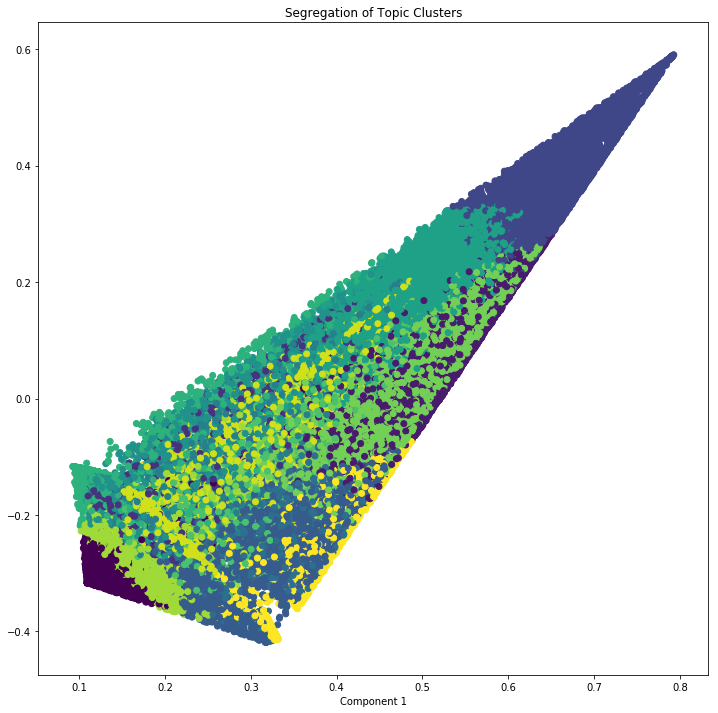

In [121]:
# Plot
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )

# Find Similar Topics w/o SA

In [123]:
nlp = spacy.load('en', disable=['parser', 'ner'])

In [124]:
def similar_documents(text, doc_topic_probs, documents = data, nlp=nlp, top_n=5, verbose=False):
    topic, x  = predict_topic(text)
    dists = euclidean_distances(x.reshape(1, -1), doc_topic_probs)[0]
    doc_ids = np.argsort(dists)[:top_n]
    if verbose:        
        print("Topic KeyWords: ", topic)
        print("Topic Prob Scores of text: ", np.round(x, 1))
        print("Most Similar Doc's Probs:  ", np.round(doc_topic_probs[doc_ids], 1))
    return doc_ids, np.take(documents, doc_ids)

In [125]:
# Get similar documents
#using same mytext from above
doc_ids, docs = similar_documents(text=mytext, doc_topic_probs=lda_output, documents = data, top_n=1, verbose=True)
print('\n', docs[0][:500])

Topic KeyWords:  ['world', 'say', 'life', 'make', 'live', 'man', 'die', 'people', 'god', 'know', 'just', 'mind', 'believe', 'time', 'fight']
Topic Prob Scores of text:  [[0.  0.  0.  0.3 0.3 0.  0.  0.2 0.2 0. ]]
Most Similar Doc's Probs:   [[0.  0.  0.  0.2 0.3 0.  0.  0.3 0.2 0. ]]

 if your happy and marching forward in your band. holding hands together, i will understand. in my life im together on my own. with my own private eggshell, and my phone. if your mind is in the darkness, could you know. if it suits you to be fast or far too slow. will you show me someone who may treat me kind. or is this world i live in just a frame of mind. if youre living in chicago , its your home. if youre living in chicago , youre alone. if youre happy living down on the ground. where the cr


# Sentiment Analysis

In [298]:
#declare
analyser = SentimentIntensityAnalyzer()

In [299]:
#just for example/test out
scores =[]
sentences = ["A really bad, horrible book.","A good, awesome, wonderful, cool book !!!  :)"]

for sentence in sentences:
    score = analyser.polarity_scores(sentence)
    scores.append(score)

In [300]:
#just for example/test out
scores

[{'neg': 0.791, 'neu': 0.209, 'pos': 0.0, 'compound': -0.8211},
 {'neg': 0.0, 'neu': 0.106, 'pos': 0.894, 'compound': 0.9507}]

In [301]:
df.index.tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [304]:
#make list for dataframe concatenation
song_sent = []
for ea_song in df.index.tolist():
    song_score = analyser.polarity_scores(df.lyrics[ea_song])
    song_sent.append(song_score)

In [305]:
song_sent

[{'neg': 0.101, 'neu': 0.813, 'pos': 0.086, 'compound': -0.1285},
 {'neg': 0.063, 'neu': 0.708, 'pos': 0.229, 'compound': 0.9938},
 {'neg': 0.01, 'neu': 0.819, 'pos': 0.17, 'compound': 0.9825},
 {'neg': 0.268, 'neu': 0.681, 'pos': 0.051, 'compound': -0.9972},
 {'neg': 0.077, 'neu': 0.745, 'pos': 0.178, 'compound': 0.8748},
 {'neg': 0.06, 'neu': 0.821, 'pos': 0.118, 'compound': 0.9645},
 {'neg': 0.0, 'neu': 0.913, 'pos': 0.087, 'compound': 0.8807},
 {'neg': 0.243, 'neu': 0.513, 'pos': 0.243, 'compound': 0.2599},
 {'neg': 0.134, 'neu': 0.629, 'pos': 0.236, 'compound': 0.9546},
 {'neg': 0.217, 'neu': 0.682, 'pos': 0.102, 'compound': -0.9784},
 {'neg': 0.017, 'neu': 0.889, 'pos': 0.095, 'compound': 0.9308},
 {'neg': 0.109, 'neu': 0.821, 'pos': 0.071, 'compound': -0.9228},
 {'neg': 0.0, 'neu': 0.938, 'pos': 0.062, 'compound': 0.8338},
 {'neg': 0.055, 'neu': 0.921, 'pos': 0.025, 'compound': -0.5661},
 {'neg': 0.063, 'neu': 0.888, 'pos': 0.05, 'compound': -0.296},
 {'neg': 0.054, 'neu': 0.906

In [306]:
type(song_sent)

list

In [311]:
type(song_sent[0])

dict

In [312]:
song_sent[0].keys()

dict_keys(['neg', 'neu', 'pos', 'compound'])

In [314]:
dfsent = pd.DataFrame(song_sent)

In [315]:
dfsent.head()

,compound,neg,neu,pos
0,-0.1285,0.101,0.813,0.086
1,0.9938,0.063,0.708,0.229
2,0.9825,0.010,0.819,0.170
3,-0.9972,0.268,0.681,0.051
4,0.8748,0.077,0.745,0.178


In [434]:
df.head()

,artist,title,lyrics,source,lyric_bow,best_lda_topic_num
0,10000 maniacs,more than this,i could feel at the time. there was no way of ...,sixgen,could feel time there be way know fall leave n...,4
1,10000 maniacs,because the night,"take me now, baby, here as i am. hold me close...",sixgen,take now baby here be hold close try understan...,3
2,10000 maniacs,these are days,these are. these are days you'll remember. nev...,sixgen,be be day remember never before never promise ...,3
3,10000 maniacs,a campfire song,"a lie to say, ""o my mountain has coal veins an...",sixgen,lie say mountain have coal vein bed dig man ax...,6
4,10000 maniacs,everyday is like sunday,trudging slowly over wet sand. back to the ben...,sixgen,trudge slowly wet sand back bench where clothe...,5


In [435]:
df = pd.concat([df, dfsent], axis=1, join='inner')

In [436]:
df.tail()

,artist,title,lyrics,source,lyric_bow,best_lda_topic_num,compound,neg,neu,pos
66907,nayara portela,shape of you (ed sheeran cover),the club isn't the best place to find a lover....,sixgen,club be not good place find lover bar be where...,3,-0.9860,0.148,0.778,0.073
66908,nayara portela,sign of the times (harry styles cover),just stop your crying. it's a sign of the time...,sixgen,just stop cry sign time welcome final show hop...,4,0.3189,0.040,0.902,0.058
66909,nayara portela,stay (rihanna cover),all along it was a fever. a cold sweat hot-hea...,sixgen,be fever cold sweat hot head believer throw ha...,4,0.9900,0.091,0.710,0.199
66910,nayara portela,when i was your man (bruno mars cover),"same bed, but it feels just a little bit bigge...",sixgen,same bed feel just little bit big now song rad...,9,-0.9934,0.273,0.712,0.015
66911,sambo,"sunday, bloody sunday",i can't believe the news today. i can't close ...,sixgen,not believe news today not close eye make go a...,4,0.9985,0.030,0.709,0.261


# Map Values of Sentiment Analysis

#### Get help with this.

In [505]:
df['sentiment'] = 0

In [506]:
df.head(2)

,artist,title,lyrics,source,lyric_bow,best_lda_topic_num,compound,neg,neu,pos,sentiment
0,10000 maniacs,more than this,i could feel at the time. there was no way of ...,sixgen,could feel time there be way know fall leave n...,4,-0.1285,0.101,0.813,0.086,0
1,10000 maniacs,because the night,"take me now, baby, here as i am. hold me close...",sixgen,take now baby here be hold close try understan...,3,0.9938,0.063,0.708,0.229,0


In [484]:
df['compound'][0]

-0.1285

In [510]:
for value in df.index.tolist():
    if df['compound'][value] >.05:
        df['sentiment'] = 'Positive'
    elif df['compound'][value] <= .05 or df['compound'][value] >= -.05:
        df['sentiment'] = 'Neutral'
    else:
        df['sentiment'] = 'Negative'

In [512]:
df.tail()

,artist,title,lyrics,source,lyric_bow,best_lda_topic_num,compound,neg,neu,pos,sentiment
66907,nayara portela,shape of you (ed sheeran cover),the club isn't the best place to find a lover....,sixgen,club be not good place find lover bar be where...,3,-0.9860,0.148,0.778,0.073,Positive
66908,nayara portela,sign of the times (harry styles cover),just stop your crying. it's a sign of the time...,sixgen,just stop cry sign time welcome final show hop...,4,0.3189,0.040,0.902,0.058,Positive
66909,nayara portela,stay (rihanna cover),all along it was a fever. a cold sweat hot-hea...,sixgen,be fever cold sweat hot head believer throw ha...,4,0.9900,0.091,0.710,0.199,Positive
66910,nayara portela,when i was your man (bruno mars cover),"same bed, but it feels just a little bit bigge...",sixgen,same bed feel just little bit big now song rad...,9,-0.9934,0.273,0.712,0.015,Positive
66911,sambo,"sunday, bloody sunday",i can't believe the news today. i can't close ...,sixgen,not believe news today not close eye make go a...,4,0.9985,0.030,0.709,0.261,Positive


In [508]:
df.head()

,artist,title,lyrics,source,lyric_bow,best_lda_topic_num,compound,neg,neu,pos,sentiment
0,10000 maniacs,more than this,i could feel at the time. there was no way of ...,sixgen,could feel time there be way know fall leave n...,4,-0.1285,0.101,0.813,0.086,Neutral
1,10000 maniacs,because the night,"take me now, baby, here as i am. hold me close...",sixgen,take now baby here be hold close try understan...,3,0.9938,0.063,0.708,0.229,Neutral
2,10000 maniacs,these are days,these are. these are days you'll remember. nev...,sixgen,be be day remember never before never promise ...,3,0.9825,0.010,0.819,0.170,Neutral
3,10000 maniacs,a campfire song,"a lie to say, ""o my mountain has coal veins an...",sixgen,lie say mountain have coal vein bed dig man ax...,6,-0.9972,0.268,0.681,0.051,Neutral
4,10000 maniacs,everyday is like sunday,trudging slowly over wet sand. back to the ben...,sixgen,trudge slowly wet sand back bench where clothe...,5,0.8748,0.077,0.745,0.178,Neutral


# Prepare Dataframe for Clutstering

In [437]:
df.head()

,artist,title,lyrics,source,lyric_bow,best_lda_topic_num,compound,neg,neu,pos
0,10000 maniacs,more than this,i could feel at the time. there was no way of ...,sixgen,could feel time there be way know fall leave n...,4,-0.1285,0.101,0.813,0.086
1,10000 maniacs,because the night,"take me now, baby, here as i am. hold me close...",sixgen,take now baby here be hold close try understan...,3,0.9938,0.063,0.708,0.229
2,10000 maniacs,these are days,these are. these are days you'll remember. nev...,sixgen,be be day remember never before never promise ...,3,0.9825,0.010,0.819,0.170
3,10000 maniacs,a campfire song,"a lie to say, ""o my mountain has coal veins an...",sixgen,lie say mountain have coal vein bed dig man ax...,6,-0.9972,0.268,0.681,0.051
4,10000 maniacs,everyday is like sunday,trudging slowly over wet sand. back to the ben...,sixgen,trudge slowly wet sand back bench where clothe...,5,0.8748,0.077,0.745,0.178


In [438]:
df.best_lda_topic_num.value_counts()

4    13940
9    10314
6     9011
5     7987
3     7500
7     5780
0     4343
1     3552
8     2791
2     1693
Name: best_lda_topic_num, dtype: int64

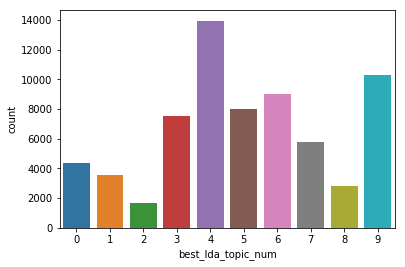

In [439]:
sns.countplot(x = 'best_lda_topic_num', data = df)

In [440]:
df.isna().sum()

artist                0
title                 0
lyrics                0
source                0
lyric_bow             0
best_lda_topic_num    0
compound              0
neg                   0
neu                   0
pos                   0
dtype: int64

In [441]:
df[["best_lda_topic_num", "compound"]].groupby(['best_lda_topic_num'], as_index=False).mean().sort_values(by='compound', ascending=False)
#this shows the overall sentiment score for each individual topic

,best_lda_topic_num,compound
3,3,0.377093
8,8,0.345949
1,1,0.322400
5,5,0.294375
9,9,0.270714
4,4,0.226000
0,0,0.224379
2,2,0.224245
6,6,0.103933
7,7,-0.078803


In [458]:
dfd = pd.concat([df,pd.get_dummies(df.best_lda_topic_num, drop_first=True)], axis = 1)
#dfdummy

In [459]:
dfd.head()

,artist,title,lyrics,source,lyric_bow,best_lda_topic_num,compound,neg,neu,pos,sentiment,1,2,3,4,5,6,7,8,9
0,10000 maniacs,more than this,i could feel at the time. there was no way of ...,sixgen,could feel time there be way know fall leave n...,4,-0.1285,0.101,0.813,0.086,,0,0,0,1,0,0,0,0,0
1,10000 maniacs,because the night,"take me now, baby, here as i am. hold me close...",sixgen,take now baby here be hold close try understan...,3,0.9938,0.063,0.708,0.229,,0,0,1,0,0,0,0,0,0
2,10000 maniacs,these are days,these are. these are days you'll remember. nev...,sixgen,be be day remember never before never promise ...,3,0.9825,0.010,0.819,0.170,,0,0,1,0,0,0,0,0,0
3,10000 maniacs,a campfire song,"a lie to say, ""o my mountain has coal veins an...",sixgen,lie say mountain have coal vein bed dig man ax...,6,-0.9972,0.268,0.681,0.051,,0,0,0,0,0,1,0,0,0
4,10000 maniacs,everyday is like sunday,trudging slowly over wet sand. back to the ben...,sixgen,trudge slowly wet sand back bench where clothe...,5,0.8748,0.077,0.745,0.178,,0,0,0,0,1,0,0,0,0


In [513]:
dfd.iloc[1]

artist                                                    10000 maniacs
title                                                 because the night
lyrics                take me now, baby, here as i am. hold me close...
source                                                           sixgen
lyric_bow             take now baby here be hold close try understan...
best_lda_topic_num                                                    3
compound                                                         0.9938
neg                                                               0.063
neu                                                               0.708
pos                                                               0.229
sentiment                                                              
1                                                                     0
2                                                                     0
3                                                               

# Cluster & Plot Similar Docs w/SA

In [460]:
# Construct the k-means clusters
clusters = KMeans(n_clusters=30, random_state=16).fit_predict(best_lda_output)

In [ ]:
#30 clusters for each sentiment score for each of the ten topics

In [461]:
clusters

array([ 6,  4, 10, ..., 13,  9,  2], dtype=int32)

In [462]:
# Build the Singular Value Decomposition(SVD) model
svd_model2 = TruncatedSVD(n_components=3)  # 2 components
lda_output_svd2 = svd_model2.fit_transform(best_lda_output)

In [463]:
# X and Y axes of the plot using SVD decomposition
x = best_lda_output[:, 0]
y = best_lda_output[:, 1]

# Weights for the 15 columns of lda_output, for each component
print("Component's weights: \n", np.round(svd_model2.components_, 2))

# Percentage of total information in 'lda_output' explained by the two components
print("Perc of Variance Explained: \n", np.round(svd_model2.explained_variance_ratio_, 2))

Component's weights: 
 [[ 0.1   0.09  0.23  0.26  0.19  0.63  0.08  0.1   0.1   0.63]
 [-0.04 -0.06  0.06 -0.13  0.   -0.67 -0.01 -0.02 -0.01  0.72]
 [ 0.23  0.16  0.43  0.63  0.33 -0.38  0.11  0.1   0.12 -0.24]]
Perc of Variance Explained: 
 [0.07 0.25 0.14]


Text(0.5, 1.0, 'Segregation of Topic Clusters')

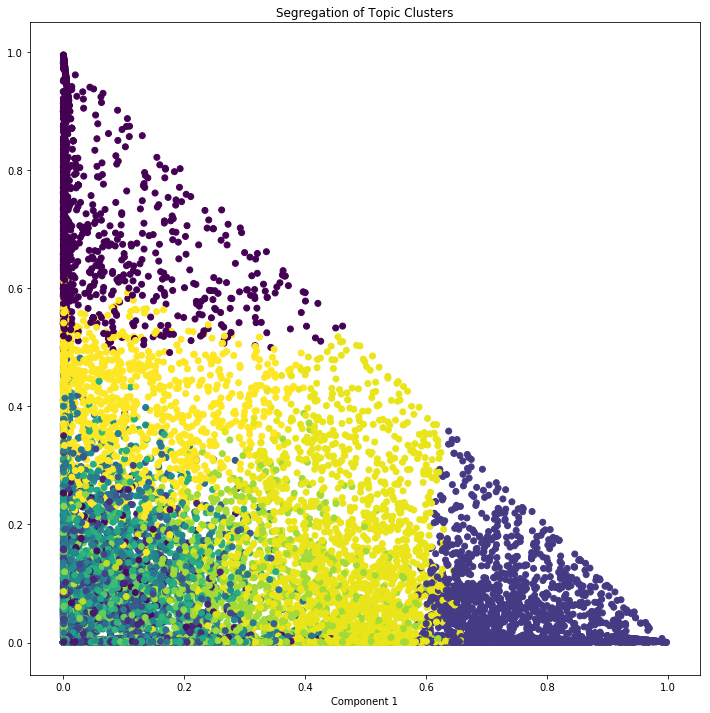

In [464]:
# Plot
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )

# Find Similar Topics

In [123]:
nlp = spacy.load('en', disable=['parser', 'ner'])

In [124]:
def similar_documents(text, doc_topic_probs, documents = data, nlp=nlp, top_n=5, verbose=False):
    topic, x  = predict_topic(text)
    dists = euclidean_distances(x.reshape(1, -1), doc_topic_probs)[0]
    doc_ids = np.argsort(dists)[:top_n]
    if verbose:        
        print("Topic KeyWords: ", topic)
        print("Topic Prob Scores of text: ", np.round(x, 1))
        print("Most Similar Doc's Probs:  ", np.round(doc_topic_probs[doc_ids], 1))
    return doc_ids, np.take(documents, doc_ids)

In [125]:
# Get similar documents
#using same mytext from above
doc_ids, docs = similar_documents(text=mytext, doc_topic_probs=lda_output, documents = data, top_n=1, verbose=True)
print('\n', docs[0][:500])

Topic KeyWords:  ['world', 'say', 'life', 'make', 'live', 'man', 'die', 'people', 'god', 'know', 'just', 'mind', 'believe', 'time', 'fight']
Topic Prob Scores of text:  [[0.  0.  0.  0.3 0.3 0.  0.  0.2 0.2 0. ]]
Most Similar Doc's Probs:   [[0.  0.  0.  0.2 0.3 0.  0.  0.3 0.2 0. ]]

 if your happy and marching forward in your band. holding hands together, i will understand. in my life im together on my own. with my own private eggshell, and my phone. if your mind is in the darkness, could you know. if it suits you to be fast or far too slow. will you show me someone who may treat me kind. or is this world i live in just a frame of mind. if youre living in chicago , its your home. if youre living in chicago , youre alone. if youre happy living down on the ground. where the cr


# Compare Performance Scores

In [ ]:
model.cv_results_

In [68]:
type(model.cv_results_)

dict

In [70]:
model.cv_results_

{'mean_fit_time': array([490.83128333, 325.88447642, 338.45103669, 311.09804177,
        284.61450497, 276.5210286 , 276.73779623, 274.55150668,
        282.44663191, 283.18468197, 273.90945935, 276.60716009,
        272.17526881, 283.55685266, 283.21943037]),
 'std_fit_time': array([51.8697212 , 42.82740966, 19.2816082 , 34.26583523,  6.33215156,
         7.60713672,  6.83242432,  4.54124243,  6.50477615,  6.70080891,
         2.12592522,  2.17143283,  5.33570057,  6.51697432,  6.83181683]),
 'mean_score_time': array([21.21683176, 15.04140687, 17.84082214, 11.59222484, 10.72356097,
        10.50761875, 10.4469916 , 10.45224373, 10.55661106, 10.59928091,
        10.5819966 , 10.67764036, 10.32603129, 10.66759968, 10.48102967]),
 'std_score_time': array([7.1268521 , 6.04499688, 5.42739727, 0.90613642, 0.24653792,
        0.31704572, 0.12478842, 0.50777658, 0.36042131, 0.29820396,
        0.35189928, 0.56871947, 0.28617608, 0.28226803, 0.32992903]),
 'param_learning_decay': masked_array(

In [75]:
model.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_learning_decay', 'param_n_components', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [176]:
model.cv_results_['mean_test_score'][6]

-13249279.887597442

In [82]:
model.cv_results_.values()

dict_values([array([490.83128333, 325.88447642, 338.45103669, 311.09804177,
       284.61450497, 276.5210286 , 276.73779623, 274.55150668,
       282.44663191, 283.18468197, 273.90945935, 276.60716009,
       272.17526881, 283.55685266, 283.21943037]), array([51.8697212 , 42.82740966, 19.2816082 , 34.26583523,  6.33215156,
        7.60713672,  6.83242432,  4.54124243,  6.50477615,  6.70080891,
        2.12592522,  2.17143283,  5.33570057,  6.51697432,  6.83181683]), array([21.21683176, 15.04140687, 17.84082214, 11.59222484, 10.72356097,
       10.50761875, 10.4469916 , 10.45224373, 10.55661106, 10.59928091,
       10.5819966 , 10.67764036, 10.32603129, 10.66759968, 10.48102967]), array([7.1268521 , 6.04499688, 5.42739727, 0.90613642, 0.24653792,
       0.31704572, 0.12478842, 0.50777658, 0.36042131, 0.29820396,
       0.35189928, 0.56871947, 0.28617608, 0.28226803, 0.32992903]), masked_array(data=[0.5, 0.5, 0.5, 0.5, 0.5, 0.7, 0.7, 0.7, 0.7, 0.7, 0.9,
                   0.9, 0.9, 0.9, 

In [73]:
model.cv_results_['mean_fit_time']

array([490.83128333, 325.88447642, 338.45103669, 311.09804177,
       284.61450497, 276.5210286 , 276.73779623, 274.55150668,
       282.44663191, 283.18468197, 273.90945935, 276.60716009,
       272.17526881, 283.55685266, 283.21943037])

In [175]:
model.cv_results_['params'][6]

{'learning_decay': 0.7, 'n_components': 15}

In [257]:
model.cv_results_['params']

[{'learning_decay': 0.5, 'n_components': 10},
 {'learning_decay': 0.5, 'n_components': 15},
 {'learning_decay': 0.5, 'n_components': 20},
 {'learning_decay': 0.5, 'n_components': 25},
 {'learning_decay': 0.5, 'n_components': 30},
 {'learning_decay': 0.7, 'n_components': 10},
 {'learning_decay': 0.7, 'n_components': 15},
 {'learning_decay': 0.7, 'n_components': 20},
 {'learning_decay': 0.7, 'n_components': 25},
 {'learning_decay': 0.7, 'n_components': 30},
 {'learning_decay': 0.9, 'n_components': 10},
 {'learning_decay': 0.9, 'n_components': 15},
 {'learning_decay': 0.9, 'n_components': 20},
 {'learning_decay': 0.9, 'n_components': 25},
 {'learning_decay': 0.9, 'n_components': 30}]

In [ ]:
    d = {}
    for k, v in iterable:
        d[k] = v

In [261]:
for key in model.cv_results_['params']:
    print(key)

{'learning_decay': 0.5, 'n_components': 10}
{'learning_decay': 0.5, 'n_components': 15}
{'learning_decay': 0.5, 'n_components': 20}
{'learning_decay': 0.5, 'n_components': 25}
{'learning_decay': 0.5, 'n_components': 30}
{'learning_decay': 0.7, 'n_components': 10}
{'learning_decay': 0.7, 'n_components': 15}
{'learning_decay': 0.7, 'n_components': 20}
{'learning_decay': 0.7, 'n_components': 25}
{'learning_decay': 0.7, 'n_components': 30}
{'learning_decay': 0.9, 'n_components': 10}
{'learning_decay': 0.9, 'n_components': 15}
{'learning_decay': 0.9, 'n_components': 20}
{'learning_decay': 0.9, 'n_components': 25}
{'learning_decay': 0.9, 'n_components': 30}


In [282]:
model.cv_results_['mean_test_score']

array([-13218459.63115705, -13233670.21270407, -13268620.41379612,
       -13312673.9564428 , -13334897.65447444, -13218597.54363693,
       -13249279.88759744, -13283918.72336598, -13302909.29946124,
       -13340185.81671307, -13236245.55253691, -13244521.63651585,
       -13271518.50883317, -13303653.95175764, -13340843.08713084])

---

In [523]:
artists = set(df.artist.values)

In [525]:
artists = list(artists)

In [526]:
type(artists)

list

In [ ]:
with open('artists.csv', 'w', newline='') as myfile:
     wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
     wr.writerow(mylist)

In [ ]:
listto.csv

In [529]:
artistdf = pd.DataFrame({'artist_name': artists})

In [530]:
artistdf.to_csv("artists.csv", sep=',',index=False)

# Steps

1) get sentiment for each song into a list
2) make that list into 'sentiment' column in dataframe that contains the "new topics"

3) cluster cluster cluster

4) assign cluster labels to songs

5) rec sys???